In [40]:
import matplotlib.pyplot as plt
# Image Loading
from PIL import Image
# Image Processing
import torchvision.transforms as transforms

In [41]:
"""
    1. Data Loading and Processing

    The code first loads an image named "Apple.jpg" using the PIL library.
    then uses torchvision.transforms to resize the image to 256x256 pixels and
    convert it into a PyTorch tensor. The tensor's shape is changed from (3,
    256, 256) to a NumPy array with the shape (256, 256, 3) to be correctly
    visualized by Matplotlib.
"""
# 1.1 load apple photo
img_path = "Apple.jpg"
# img_path = "banana.jpg"
img = Image.open(img_path)

# 1.2 to tensor conversion
tf = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
img_tensor = tf(img)
print(img_tensor.shape)
print(img_tensor[0,128])


torch.Size([3, 256, 256])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9961, 0.9451, 0.5961,
        0.3922, 0.4078, 0.4784, 0.4980, 0.5098, 0.4784, 0.4235, 0.4706, 0.5412,
        0.5137, 0.4902, 0.4902, 0.4863, 0.4745, 0.4392, 0.4431, 0.4275, 0.4510,
        0.4863, 0.4784, 0.4706, 0.5216, 0.5412, 0.5373, 0.5176, 0.4824, 0.5020,
        0.5098, 0.5098, 0.5216, 0.5294, 0.5373, 0.5333, 0.4941, 0.5020, 0.5059,
        0.5020, 0.5176, 0.4588, 0.4706, 0.5137, 0.5333, 0.5412, 0.5451, 0.5608,
        0.6000, 0.6039, 0.6000, 0.5686, 0.5216, 0.5843, 0.6706, 0.6510, 0.6000,
        0.5373, 0.5490, 0.5569, 0.5804, 0.5961, 0.5765, 0.5529, 0.5490, 0.5451,
        0.5137, 0.4902, 0.4980, 0.4941, 0.4980, 0.5490, 0.5686, 0.5490, 0.5608,
        0.5451, 0.5098, 0.5294, 0.5412, 0.5216, 0.5255, 0.5333, 0.5216, 0.4902,
        0.4824

In [42]:
# 1.3 tensor to numpy array [256, 256, 3]
img_ndarray = img_tensor.numpy().transpose((1, 2, 0))
print(img_ndarray.shape)

(256, 256, 3)


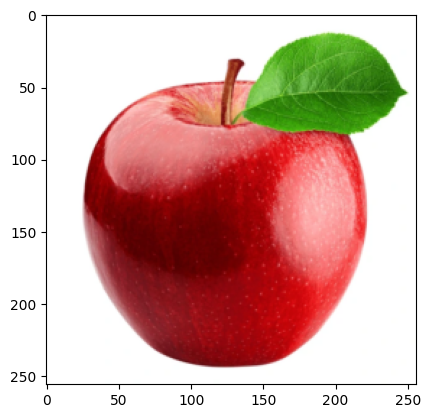

In [43]:
# 1.4 visualize the photo
plt.imshow(img_ndarray)
# plt.axis('off')
plt.show()

In [44]:
"""
    2. Model Creation - Autoencoder

    This model consists of two parts:

    Encoder: This section uses two Conv2d layers followed by MaxPool2d layers
    to progressively reduce the image's dimensions and compress its features.
    The input is a 3-channel image, and the encoder outputs an 8-channel
    compressed representation.

    Decoder: This section uses two ConvTranspose2d (transposed convolution)
    layers to decompress the encoded features and reconstruct the image,
    bringing the channel count back to 3.
"""
import torch
import torch.nn as nn

In [45]:
# 2.1 Autoencoder
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # the first convolutional and pooling layer
            nn.Conv2d(in_channels=3,
                      out_channels=16,
                      kernel_size=3, # K = 2P + 1
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # the second convolutional and pooling layer
            nn.Conv2d(16,8,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8,
                               out_channels=16,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,
                               kernel_size=3,
                               stride=2,
                               padding= 1,
                               output_padding=1),
            nn.Sigmoid()

        )

    def forward(self, x):
        x = self.encoder(x)
        # print(x.shape)
        x = self.decoder(x)
        # print(x.shape)
        return x

model = AutoEncoder()
# Inference (Test Forward Propagation)
# N C H W
y = model(torch.randn(1, 3, 256, 256))
print(y.shape)

torch.Size([1, 3, 256, 256])


In [46]:
"""
    3. Model Training

    The model is trained for 400 epochs on the single apple image. The
    training loop performs these steps repeatedly:

    Forward Propagation: The image tensor is fed into the autoencoder to get a
    reconstructed image.

    Loss Calculation: The Mean Squared Error (MSE) loss function is used to
    measure the difference between the reconstructed image and the original
    image.

    Backpropagation: The loss value is used to calculate the gradients for
    each parameter in the model.

    Weight Update: An Adam optimizer adjusts the model's weights to minimize
    the loss.
"""
import torch.optim as optim

In [47]:
# 3.1 define the loss function and the optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 3.2 number of training epochs
epochs_num = 400

In [48]:
# 3.3 training an Autoencoder
for epoch in range(epochs_num):
    output = model(img_tensor) # Forward Propagation
    loss_value = loss(output, img_tensor) # Loss Calculation
    loss_value.backward() # backpropagation
    optimizer.step() # Weight Update
    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1}/{epochs_num}, Loss: {loss_value.item():.4f}")

Epoch: 10/400, Loss: 0.1664
Epoch: 20/400, Loss: 0.1641
Epoch: 30/400, Loss: 0.1570
Epoch: 40/400, Loss: 0.1339
Epoch: 50/400, Loss: 0.1030
Epoch: 60/400, Loss: 0.0757
Epoch: 70/400, Loss: 0.0534
Epoch: 80/400, Loss: 0.0398
Epoch: 90/400, Loss: 0.0319
Epoch: 100/400, Loss: 0.0270
Epoch: 110/400, Loss: 0.0238
Epoch: 120/400, Loss: 0.0213
Epoch: 130/400, Loss: 0.0193
Epoch: 140/400, Loss: 0.0178
Epoch: 150/400, Loss: 0.0167
Epoch: 160/400, Loss: 0.0159
Epoch: 170/400, Loss: 0.0152
Epoch: 180/400, Loss: 0.0146
Epoch: 190/400, Loss: 0.0141
Epoch: 200/400, Loss: 0.0135
Epoch: 210/400, Loss: 0.0130
Epoch: 220/400, Loss: 0.0126
Epoch: 230/400, Loss: 0.0121
Epoch: 240/400, Loss: 0.0117
Epoch: 250/400, Loss: 0.0112
Epoch: 260/400, Loss: 0.0108
Epoch: 270/400, Loss: 0.0103
Epoch: 280/400, Loss: 0.0098
Epoch: 290/400, Loss: 0.0094
Epoch: 300/400, Loss: 0.0089
Epoch: 310/400, Loss: 0.0083
Epoch: 320/400, Loss: 0.0076
Epoch: 330/400, Loss: 0.0066
Epoch: 340/400, Loss: 0.0057
Epoch: 350/400, Loss: 0

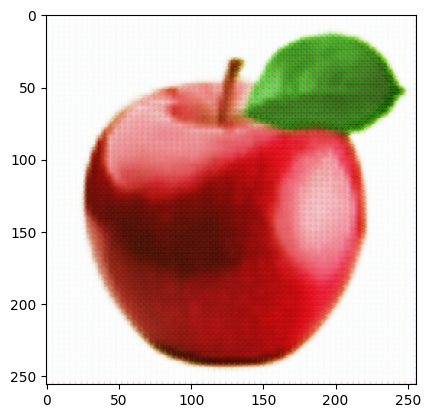

In [49]:
"""
    4. Image Reconstruction

    After training, the model's weights are frozen (torch.no_grad()). The
    original image is fed into the trained autoencoder one last time to
    produce the final reconstructed image. This image is then converted back
    into a NumPy array and displayed using Matplotlib, so you can see the
    result of the autoencoder's work.
"""
with torch.no_grad():
    # forward propagation
    img_recon = model(img_tensor)

img_ndarray2 = img_recon.numpy().transpose((1, 2, 0))
plt.imshow(img_ndarray2)
# plt.axis('off')
plt.show()